# Exploratory analysis of CORA profiles
This notebook import the csv file generated at the step 01 and store in the data folder of this repository.

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cartopy
import cartopy.crs as ccrs

# path to CORA database
yyyy = '2018';
pathtodatafile2 = '~/Dropbox/Perso/Dataproject/ds_portfolio/data/index_CORA_TS_OA_REP/'

import csv data

In [2]:
# import temperature data
df_t = pd.read_csv(pathtodatafile2+'CORA_TS_OA_REP_NATL_temp_'+yyyy+'.csv')
df_s = pd.read_csv(pathtodatafile2+'CORA_TS_OA_REP_NATL_psal_'+yyyy+'.csv')

In [3]:
print(df_t)

       N_PROF PLATFORM_NUMBER  WMO_INST_TYPE   LATITUDE  LONGITUDE  \
0           0        IF000552           1023  46.702885  -2.290287   
1           1        IF000552           1023  46.702885  -2.290287   
2           2        IF000552           1023  46.702888  -2.290287   
3           3        FQBE               1023  48.616932  -4.697662   
4           4        FQBE               1023  48.789894  -4.316039   
...       ...             ...            ...        ...        ...   
71862   71862        6901208             846  62.283100 -14.156700   
71863   71863        3901663             846  52.373001 -31.114000   
71864   71864        3901663             846  51.985001 -29.052999   
71865   71865        3901663             846  51.379002 -28.136000   
71866   71866        3901663             846  51.097000 -28.054001   

                                SOURCE      TEMP0  TEMP1000  TEMP2000  \
0      OA_CORA5.2_20180115_dat_TEMP.nc  11.107286       NaN       NaN   
1      OA_COR

# Basic data description

In [4]:
df_t.describe()

,N_PROF,WMO_INST_TYPE,LATITUDE,LONGITUDE,TEMP0,TEMP1000,TEMP2000
count,71867.000000,71867.000000,71867.000000,71867.000000,67032.000000,38945.000000,5967.000000
mean,35933.000000,852.360917,42.071308,-44.290613,15.634587,5.626945,3.623098
std,20746.360235,207.738981,12.948989,22.924929,8.871196,2.287294,0.517848
min,0.000000,11.000000,20.000055,-84.999825,-1.800000,-0.692000,-0.783000
25%,17966.500000,844.000000,30.893942,-63.657719,7.927750,3.810207,3.471000
50%,35933.000000,846.000000,43.308472,-46.119999,16.310500,5.460696,3.643000
75%,53899.500000,995.000000,51.525499,-26.173140,23.854752,7.143000,3.805700
max,71866.000000,1025.000000,69.976501,-0.000092,32.376470,13.240888,13.221000


In [5]:
df_s.describe()

,N_PROF,WMO_INST_TYPE,LATITUDE,LONGITUDE,PSAL0,PSAL1000,PSAL2000
count,79599.000000,79599.000000,79599.000000,79599.000000,56431.000000,39266.000000,5657.000000
mean,39799.000000,909.869521,42.263421,-41.762068,35.007441,35.104855,34.972309
std,22978.396376,84.254624,13.098308,23.502592,2.186381,0.326021,0.054622
min,0.000000,820.000000,20.000055,-84.999825,0.000000,34.481160,34.853000
25%,19899.500000,844.000000,31.019759,-61.923697,34.625500,34.912920,34.930000
50%,39799.000000,854.000000,43.392693,-41.326698,35.292477,35.009583,34.964832
75%,59698.500000,1023.000000,51.883999,-21.501045,36.440000,35.158070,34.996666
max,79598.000000,1025.000000,69.976501,-0.003885,39.510000,38.514000,35.245000


### Merge temperature and salinity dataframe

In [6]:
df_ts=pd.merge(df_t, df_s, on=["PLATFORM_NUMBER","WMO_INST_TYPE","LATITUDE","LONGITUDE","DATE"], how="outer")

In [7]:
df_ts = df_ts.drop(columns=['N_PROF_x', 'N_PROF_y'])
df_ts.head()


,PLATFORM_NUMBER,WMO_INST_TYPE,LATITUDE,LONGITUDE,SOURCE_x,TEMP0,TEMP1000,TEMP2000,DATE,SOURCE_y,PSAL0,PSAL1000,PSAL2000
0,IF000552,1023,46.702885,-2.290287,OA_CORA5.2_20180115_dat_TEMP.nc,11.107286,NaN,NaN,2017-12-16 00:42:11.250000000,NaN,NaN,NaN,NaN
1,IF000552,1023,46.702885,-2.290287,OA_CORA5.2_20180115_dat_TEMP.nc,10.780083,NaN,NaN,2017-12-23 21:42:11.250000000,NaN,NaN,NaN,NaN
2,IF000552,1023,46.702888,-2.290287,OA_CORA5.2_20180115_dat_TEMP.nc,10.302134,NaN,NaN,2017-12-29 13:49:41.250000000,NaN,NaN,NaN,NaN
3,FQBE,1023,48.616932,-4.697662,OA_CORA5.2_20180115_dat_TEMP.nc,14.076893,NaN,NaN,2017-12-06 14:20:37.500000000,NaN,NaN,NaN,NaN
4,FQBE,1023,48.789894,-4.316039,OA_CORA5.2_20180115_dat_TEMP.nc,11.668028,NaN,NaN,2017-12-18 05:26:15.000000000,NaN,NaN,NaN,NaN



### Visual check of data quality

array([[<AxesSubplot:title={'center':'WMO_INST_TYPE'}>,
        <AxesSubplot:title={'center':'LATITUDE'}>,
        <AxesSubplot:title={'center':'LONGITUDE'}>],
       [<AxesSubplot:title={'center':'TEMP0'}>,
        <AxesSubplot:title={'center':'TEMP1000'}>,
        <AxesSubplot:title={'center':'TEMP2000'}>],
       [<AxesSubplot:title={'center':'PSAL0'}>,
        <AxesSubplot:title={'center':'PSAL1000'}>,
        <AxesSubplot:title={'center':'PSAL2000'}>]], dtype=object)

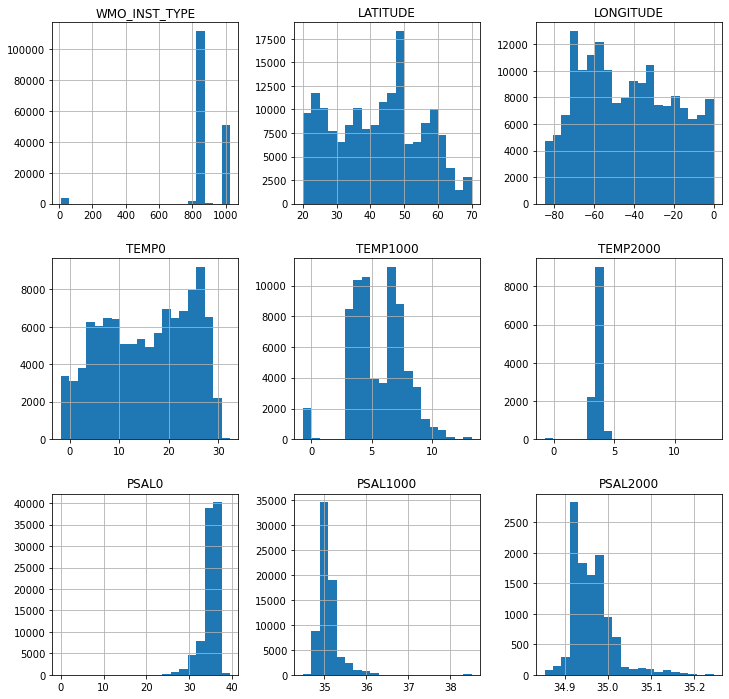

In [8]:
df_ts.hist(bins=20, figsize=(12,12), layout=(3, 3))

### Data selection


Let's keep the temperature and salinity at 1000m for the cluster analysis as it doesnt have a strong seasonal variation compare to the surface. Therefore its is mostly the geographical parameters that will influence its distribution.


#### Imputation of lines if TEMP1000 and SAL1000 are nan

In [9]:
df_ts=df_ts[(df_ts['TEMP1000'].notnull())]#| df_ts['PSAL1000'].notnull())]
df_ts.describe()

,WMO_INST_TYPE,LATITUDE,LONGITUDE,TEMP0,TEMP1000,TEMP2000,PSAL0,PSAL1000,PSAL2000
count,70028.000000,70028.000000,70028.000000,62847.000000,70028.000000,11676.000000,44140.000000,51162.000000,8653.000000
mean,848.647712,43.225598,-42.816249,15.696916,5.585829,3.611160,35.580358,35.057949,34.952763
std,37.998794,13.086817,18.303684,8.239704,2.174777,0.418023,1.417569,0.199403,0.034223
min,11.000000,20.003460,-84.994843,-1.766000,-0.692000,-0.783000,0.000000,34.485916,34.853000
25%,846.000000,32.574001,-57.296982,7.967500,3.849700,3.463000,34.787000,34.922390,34.926000
50%,846.000000,42.086342,-43.393250,16.275000,5.476100,3.624400,35.571000,35.020570,34.948000
75%,854.000000,55.632000,-29.799253,23.211893,7.088167,3.782500,36.599759,35.133250,34.976000
max,999.000000,69.976501,-0.085500,30.631000,13.240888,13.221000,37.901000,38.506172,35.245000


#### Dropping the outlier rows with standard deviation

For temperature:

In [10]:
factor = 3
upper_lim = df_ts['TEMP1000'].mean() + df_ts['TEMP1000'].std() * factor
lower_lim = df_ts['TEMP1000'].mean() - df_ts['TEMP1000'].std() * factor

np.sum(~(df_ts['TEMP1000'] < upper_lim) & (df_ts['TEMP1000'] > lower_lim))



170

In [11]:
df_ts = df_ts[(df_ts['TEMP1000'] < upper_lim) & (df_ts['TEMP1000'] > lower_lim)]


#### Additional Plots

Import Seaborn library

In [12]:
import seaborn as sns
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 10]})


In [13]:
df_ts.describe()

,WMO_INST_TYPE,LATITUDE,LONGITUDE,TEMP0,TEMP1000,TEMP2000,PSAL0,PSAL1000,PSAL2000
count,69858.000000,69858.000000,69858.000000,62679.000000,69858.000000,11674.000000,44093.000000,51124.000000,8653.000000
mean,848.663260,43.241793,-42.915174,15.687937,5.567424,3.609513,35.578921,35.055392,34.952763
std,38.043344,13.098580,18.215295,8.246026,2.145127,0.398683,1.417555,0.176036,0.034223
min,11.000000,20.003460,-84.994843,-1.766000,-0.692000,-0.783000,0.000000,34.485916,34.853000
25%,846.000000,32.543947,-57.344377,7.953000,3.847277,3.463000,34.786083,34.922363,34.926000
50%,846.000000,42.122002,-43.432301,16.261000,5.456526,3.624400,35.568000,35.020237,34.948000
75%,854.000000,55.647369,-29.888599,23.210500,7.083358,3.782500,36.598858,35.133125,34.976000
max,999.000000,69.976501,-0.085500,30.631000,11.944667,5.110000,37.678000,36.281075,35.245000


Plot map of temperature at 100m depth

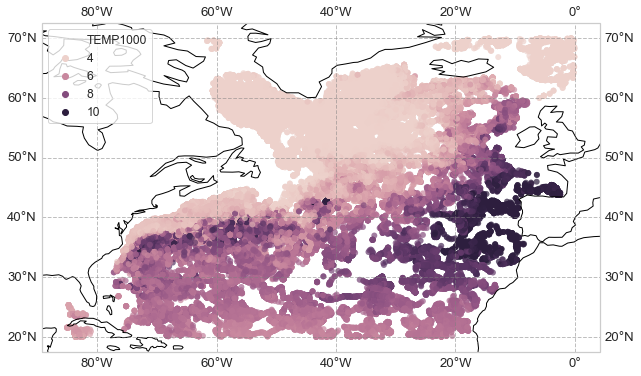

In [14]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')


scatplot=sns.scatterplot(x=df_ts['LONGITUDE'], y=df_ts['LATITUDE'],
                hue=df_ts['TEMP1000'],
                hue_norm=(4, 10),legend="brief",
                linewidth=0, alpha = 0.7);
scatplot.legend(loc=2)

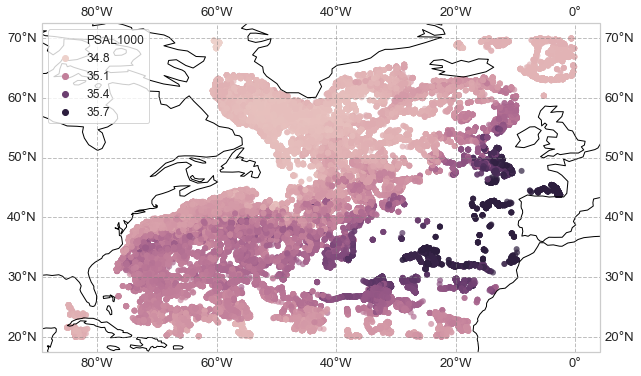

In [15]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

scatplot=sns.scatterplot(x=df_ts['LONGITUDE'], y=df_ts['LATITUDE'],
                hue=df_ts['PSAL1000'],
                hue_norm=(34.8, 35.6),legend="brief",
                linewidth=0, alpha = 0.7);
scatplot.legend(loc=2)

<Figure size 720x720 with 0 Axes>

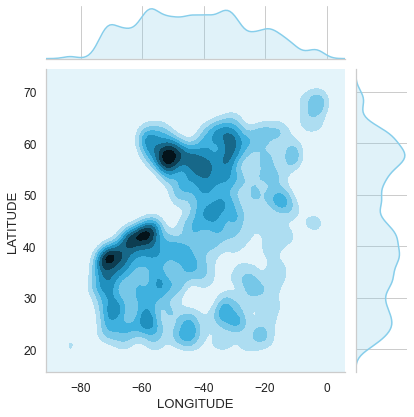

In [16]:
# Plot distribution of data for a non null variable TEMP1000
plt.figure(figsize=(10, 10) )
g3=sns.jointplot(x=df_ts[df_ts['TEMP1000'].notnull()]['LONGITUDE'], y=df_ts[df_ts['TEMP1000'].notnull()]['LATITUDE'],kind='kde', color="skyblue")
#g3.ax_joint.grid(color='r', linestyle='-', linewidth=2) # dosn't work, grid axes is hidden below colormap


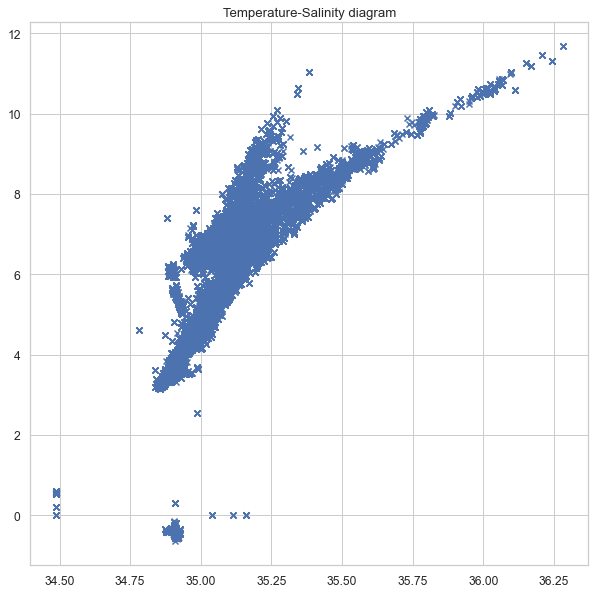

In [17]:
plt.figure()
plt.title('Temperature-Salinity diagram')
plt.scatter(df_ts['PSAL1000'],df_ts['TEMP1000'],marker='x')
plt.ylabel='temperature'
plt.xlabel='salinity'

In physical oceanography,  a water mass is defined as body of ocean water with a distinctive narrow range of temperature and salinity and a particular density. 

Water masses are formed as the result of climatic effects in specific regions.

On the temperature-salinity diagram above we can distinguish that the distribution is squeeze. toward several end-points:\
(34.8  ; 0)\
(34,8  ; 3)\
(35.3 ; 11)\
(36.25 ; 12)\

**Can we use machine learning to detect these different water masses?**

In [18]:
# Save data into a pickle file.
import pickle

pickle.dump( df_ts, open( "save_df_t.p", "wb" ) )